#plotting sigmoid function

In [438]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

$S_{w,b}(x)=\frac{1}{1+e^{-(wx+b)}}$

>



In [439]:
def sigmoid(x,w,b):
  return (1/(1+np.exp(-(w*x+b))))

In [440]:
sigmoid(1,0.5,0)

0.6224593312018546

In [441]:
w=0.9
b=0.1
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)


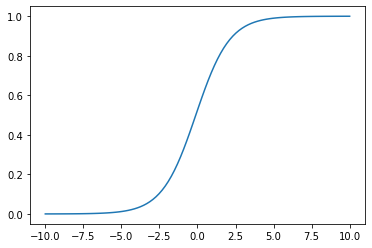

In [442]:
plt.plot(X,Y)
plt.show()

copied code from code snippet

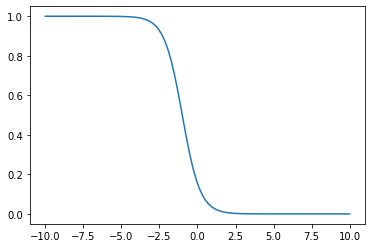

In [443]:
#negative sigmoid function
w=-1.7   #@param {type: "slider", min: -2, max: 2, step:0.1}

b=-1.7  #@param {type: "slider", min: -2, max: 2, step:0.1}
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)
plt.plot(X,Y)
plt.show()


$S_{w_1,w_2,b}(x_1,x_2)=\frac{1}{1+e^{-(w_1*x_1+w_2*x_2+b)}}$

In [444]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return (1/(1+np.exp(-(w1*x1+w2*x2+b))))

In [445]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [446]:
from mpl_toolkits import mplot3d

In [447]:

X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)

In [448]:
print(X1.shape,X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [449]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX1,w1,w2,b)

Text(0.5, 0, 'y')

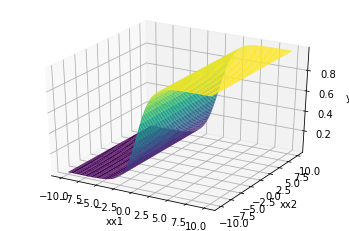

In [450]:
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.plot_surface(XX1,XX2,Y,cmap='viridis')
ax.set_xlabel('xx1')
ax.set_ylabel('xx2')
ax.set_zlabel('y')

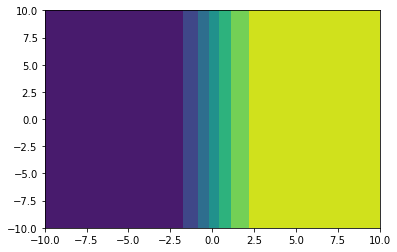

In [451]:
plt.contourf(XX1,XX2,Y)
plt.show()

#compute loss

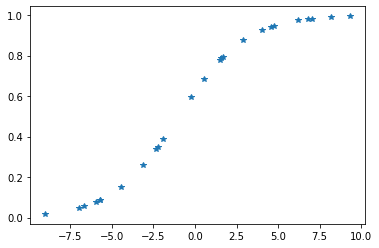

In [452]:
w_unknown=0.5
b_unknown=0.5
X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)
plt.plot(X,Y,'*')
plt.show()

In [453]:
def calculate_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss +=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [454]:
W=np.linspace(-1,1,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)

In [455]:
WW.shape

(100, 100)

In [456]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j]= calculate_loss(X,Y,WW[i,j],BB[i,j])

Text(0.5, 0, 'Loss')

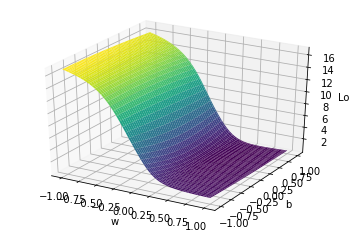

In [457]:
fig=plt.figure()
ax=plt.axes(projection="3d")
ax.plot_surface(WW,BB,Loss,cmap="viridis")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel('Loss')


In [458]:
ij=np.argmin(Loss)
i=int(np.floor(ij/Loss.shape[1]))
j=int(ij-i*Loss.shape[1])

In [459]:
print(ij)

7474


In [460]:
print(WW[i,j],BB[i,j])

0.49494949494949503 0.49494949494949503


#Sigmoid Class

In [461]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None

  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b

  def sigmoid(self,x):
    return 1.0/(1.0 + np.exp(-x))

  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)* y_pred * (1-y_pred) * x

  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)* y_pred * (1-y_pred) 

  def fit(self,X,Y,epochs=1, learning_rate=1,initialise=True,display_loss=False):
    if initialise:
      self.w=np.random.randn(1,X.shape[1])
      self.b=0

    if display_loss:
      loss={}

    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw +=self.grad_w(x,y)
        db +=self.grad_b(x,y)
      self.w -=learning_rate * dw
      self.b -=learning_rate * db

      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(x))
        loss[i]=mean_squared_error(Y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel("epochs")
      plt.ylabel("mean squared error")
      plt.show() 
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)


##test

In [462]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [463]:
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [464]:
print(sn.w,sn.b)

[[0.94756861 0.33498474]] [0.02549157]


In [465]:
#sn.fit(X,Y,1,0.5,True)
for i in range(10):
  print(sn.w,sn.b)
  sn.fit(X,Y,1,0.5,False)

[[0.94756861 0.33498474]] [0.02549157]
[[ 1.00459823 -0.09457586]] [0.06529272]
[[ 0.98220828 -0.4655042 ]] [-0.00356353]
[[ 1.13209614 -0.27420901]] [-0.06001248]
[[ 1.13893703 -0.46065025]] [-0.12196675]
[[ 1.237304   -0.35901336]] [-0.1689947]
[[ 1.26020521 -0.45216766]] [-0.21662074]
[[ 1.32066781 -0.42203871]] [-0.25554934]
[[ 1.35404941 -0.45673898]] [-0.29293435]
[[ 1.3950394  -0.45984732]] [-0.32613074]


In [466]:
def plot_sn(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val=np.asarray([X1[j],X2[i]])
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap='viridis', alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=b,cmap='viridis')
  ax.plot()

In [467]:
#plt.figure(figsize=(15,5))
#sn.fit(X,Y,1,0.25,True)
#N=20
#for i in range(N):
 # print(sn.w,sn.b)
 # ax=plt.subplot(N,1,i+1)
  #plot_sn(X,Y,sn,ax)
  #sn.fit(X,Y,1,0.25,True)
  

## Load data

In [468]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

In [469]:
data=pd.read_csv("mobile_cleaned.csv")

In [470]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [471]:
data.shape

(341, 88)

In [472]:
X=data.drop('Rating',axis=1)
#Y=data['Rating']

In [473]:
Y=data['Rating'].values  #convert into numpy

In [474]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [475]:
threshold=4.2
data['class']=(data['Rating']>=threshold)

In [476]:
data['class'].head()

0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool

In [477]:
data['class']=(data['Rating']>=threshold).astype(np.int) #convert class into number

In [478]:
data['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [479]:
data['class'].value_counts()

0    182
1    159
Name: class, dtype: int64

In [480]:
#threshold=4.2
data['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

In [481]:
Y_binarised=data['class'].values

In [482]:
Y_binarised

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [483]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0, stratify=Y_binarised)

In [484]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(255, 87) (86, 87) (255,) (86,)


In [485]:
X_train.head(2)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
293,408,267,5.50,163,4,1.5,71.88,151.5,32,3020,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
59,77,270,6.22,152,4,2.0,82.33,155.2,64,3260,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [486]:
X_test.head(2)

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
270,374,515,5.7,174,4,2.15,71.73,159.5,64,3200,5,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
40,57,409,6.3,168,4,2.10,83.68,157.0,64,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [487]:
Y_train

array([4.2, 4.3, 4.3, 4. , 4.5, 4.1, 4.2, 4.3, 4.1, 4.4, 4.3, 3. , 4.5,
       4.3, 4.8, 4.4, 4. , 4.4, 4.6, 4.2, 4.5, 4.3, 3.3, 4.3, 3.4, 4.4,
       4.3, 4.1, 4.3, 4.4, 4. , 4.5, 3.1, 3.5, 4.2, 3.6, 4.1, 3.8, 4.2,
       4. , 4. , 3.9, 4.1, 3.9, 4.3, 3.7, 4.2, 4.1, 4.3, 4.1, 4.3, 4.4,
       4.2, 3.8, 4. , 4.2, 4.4, 4.3, 4.4, 3.8, 3.9, 4.4, 3.9, 3.9, 4.2,
       3.9, 4.5, 3.9, 3.4, 4.5, 4.4, 4. , 4.5, 4.1, 4.4, 4.5, 3.9, 4.3,
       4.4, 4.3, 4.4, 3.9, 4. , 4.1, 4. , 4.2, 3.9, 4. , 3. , 4.3, 4.3,
       4.7, 3.4, 3.3, 3.5, 4.1, 3.8, 4.2, 5. , 4. , 4.3, 4.2, 4.1, 4.1,
       4.2, 4.2, 3.8, 4.4, 4. , 3.7, 4.1, 4. , 4.2, 3.7, 4.5, 4. , 4.1,
       3.5, 4.3, 4. , 4.5, 3.9, 4.2, 3.8, 4.3, 3. , 3.4, 4.3, 3.4, 3.9,
       4.3, 4.1, 4.1, 3.9, 4.4, 4. , 4.4, 4.2, 3.7, 3.8, 4.1, 4.4, 4.2,
       3.8, 4.5, 4.7, 3.9, 4.2, 4.3, 4. , 3.5, 3.9, 4.4, 4.1, 4.3, 2.8,
       4.5, 4.1, 4.2, 3.7, 3.9, 4. , 3.8, 4.4, 4. , 2.5, 4. , 4.2, 3.7,
       4.1, 4.1, 4. , 4.3, 4.3, 4.4, 4.1, 4. , 4. , 4.4, 4.4, 3.

In [488]:
scaler=StandardScaler()

In [489]:
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

In [490]:
minmax_scaler=MinMaxScaler()

In [491]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [492]:
np.min(Y_scaled_train)

0.0

In [493]:
np.max(Y_scaled_train)

1.0

In [494]:
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [495]:
scaled_threshold=list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]

In [496]:
scaled_threshold

0.6800000000000002

In [497]:
Y_binarised_train=(Y_scaled_train>scaled_threshold).astype("int").ravel()

In [498]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [499]:
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype("int").ravel()

In [500]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [501]:
sn=SigmoidNeuron()

In [503]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=1000,learning_rate=0.01)

In [504]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [505]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [506]:
accuract_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [507]:
print(accuract_train,accuracy_test)

0.8235294117647058 0.8372093023255814
